# Capstone Project - The Battle of the Neighborhoods in Dortmund

## 1. Introduction/Business Understanding

### 1.1 Description of the problem

Our business problem we are facing is that around every two to three weeks there are football home games of the First Bundesliga Club Borussia Dortmund. How can we provide support to visitors to list and visualize Dortmund boroughs that fit their needs for food venues.

### 1.2 Discussion of the background

Dortmund is a city with around 585.000 inhabitants and twelve boroughs. Dortmund is well known for its football First Bundesliga Club Borussia Dortmund. Many visitors come to Dortmund to watch their games.

I think it is hard vor visitors to choose the right place to stay, especially if there are looking for lots and good food choices. As there are many recommendations on the web it's hard to filter out which is the right choice for the visitor.

In this capstone project I am adressing this problem with the help of Foursquare location data and machine learning to help the visitors to make a decision and find the appropriate neighborhood. I will use the Foursquare location data and clustering methods for grouping the boroughs to different groups by their restaurant venues information.

## 2. Data

We will use the following data:

**List of the twelve boroughs of Dortmund with their latitude and longitude**

* Datasource: https://de.wikipedia.org/wiki/Liste_der_Dortmunder_Stadtteile

* Description: We will use the first list and drop the details so that we have only the twelve boroughs and enrich the table with the coordinates using geocoder class of Geopy client.

**Restaurants in each borough**

* Data source: Foursquare APIs

* Description : By this we will get all the venues in each borough. We will filter these venues to get only restaurants.

## 3. Methodology

### 3.1 Data Preparation

Load numpy and pandas

In [1]:
import numpy as np 
import pandas as pd 

!conda install -c conda-forge lxml --yes

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                                                   \failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.9|3.6.9|3.6.9|3.6.9|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|3.4.*',build='3_73_pypy|2_73_pypy|1_73_pypy|0_73_pypy']
  - rsa -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.7


### 3.1.1 Scraping Dortmund Boroughs Table from Wikipedia

 Use pandas to transform the data frp, the table on the Wikipedia into a dataframe

In [2]:
df = pd.read_html('https://de.wikipedia.org/wiki/Liste_der_Dortmunder_Stadtteile')[0]

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df

,Nr.,An-zahlUnt.-bez.,Bezirk,Fläche[km²][1],Sied-lungs-fläche[km²][2],Einwohner[1],EW/ km²,EW/ km²Siedl.-fläche,(Haupt-)Gemarkungen
0,000–03,13,Stadtbezirk Innenstadt-West,13760,271.00,51.522,3740,19.0,"DO, Dorstfeld, Marten"
1,00,4,City,1779,61.00,9.128,5130,15.0,DO
2,01,3,Westfalenhalle,3741,71.00,15.420,4120,21.7,DO
3,02,3,Dorstfelder Brücke,2115,35.00,11.793,5580,33.7,DO
4,03,3,Dorstfeld,6124,1.04,15.181,2480,14.6,"Dorstfeld, Marten (Südosten der Gemarkung, Ind..."
5,004–06,9,Stadtbezirk Innenstadt-Nord,14415,151.00,53.164,3690,35.2,DO
6,04,3,Hafen,4617,45.00,17.072,3700,37.9,DO
7,05,4,Nordmarkt,3246,69.00,24.951,7690,36.2,DO
8,06,2,Borsigplatz,6552,36.00,11.141,1700,30.9,DO
9,007–09,9,Stadtbezirk Innenstadt-Ost,11265,321.00,53.690,4770,16.7,DO (inkl. Körne)


Keep only Column "Bezirk", keep only the boroughs that we need, split the "Bezirk" and get rid of the first word. Then add City "Dortmund" before it so that geopy can find it. Also add borough 'Dortmund Mitte' that is missing in the wikipedia table

In [4]:
Boroughs = df[['Bezirk']]
indices = [0 , 5 , 9 , 14 , 19 , 27, 32, 38 , 46 , 56 , 63 , 68]
Boroughs = Boroughs.loc[indices]
Boroughs[['Stadtbezirk','Borough']] = Boroughs.Bezirk.str.split(" ",expand=True,)
Boroughs = Boroughs[['Borough']]
Boroughs['Borough'] = 'Dortmund ' + Boroughs['Borough'].astype(str)
Boroughs.loc[len(Boroughs.index)] = ['Dortmund Mitte']  
Boroughs

,Borough
0,Dortmund Innenstadt-West
5,Dortmund Innenstadt-Nord
9,Dortmund Innenstadt-Ost
14,Dortmund Eving
19,Dortmund Scharnhorst
27,Dortmund Brackel
32,Dortmund Aplerbeck
38,Dortmund Hörde
46,Dortmund Hombruch
56,Dortmund Lütgendortmund


Import Geospital data

In [5]:
!conda install -c conda-forge geopy --yes

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                       |failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.9|3.6.9|3.6.9|3.6.9|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|3.4.*',build='0_73_pypy|2_73_pypy|3_73_pypy|1_73_pypy']
  - geopy -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']
  - rsa -> python[version='2.7.*|3.4.*|3.5.*|3.6.*'

plotly -> retrying[version='>=1.3.3']
ibm-wsrt-py37main-main -> retrying==1.3.3[build=*]

Package libxgboost conflicts for:
ibm-wsrt-py37main-main -> libxgboost==0.90[build=*]
py-xgboost -> libxgboost[version='0.7|0.71|0.72|0.72|0.72|0.80|0.80|0.80|0.80|0.80|0.80|0.81|0.81|0.82|0.82|0.90|0.90|0.90|0.90|1.0.2|1.0.2|1.1.1|1.2.0|0.90|0.90|0.90|0.90|0.90|0.90',build='he6710b0_0|hf484d3e_1|hfc679d8_0|he1b5a44_1|he1b5a44_1|he1b5a44_3|he1b5a44_4|he1b5a44_0|he1b5a44_1|he1b5a44_0|he1b5a44_2|he1b5a44_0|hf484d3e_1000|hf484d3e_1001|hfc679d8_1|he6710b0_1|h6edc907_0|h4d71fd4_0|h688424c_0|h51060c3_0|h6edc907_0|h6cbba54_0|he6710b0_0|h87a4715_0|h83be7fe_0|hf484d3e_0|hf484d3e_0|hf484d3e_0']

Package futures conflicts for:
tensorboard -> futures[version='>=3.1.1']
bokeh -> futures[version='>=3.0.3']
imageio -> futures
s3transfer -> futures[version='>=2.2.0,<4.0.0']
tornado -> futures
grpcio -> futures[version='>=2.2.0']
jupyterlab -> futures

Package enum34 conflicts for:
brotlipy -> enum34
cryptography 

Now find the location data for each borough

In [6]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="http")

Boroughs['Dist_Coord']= Boroughs['Borough'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
Boroughs[['Latitude', 'Longitude']] = Boroughs['Dist_Coord'].apply(pd.Series)

Boroughs.drop(['Dist_Coord'], axis=1, inplace=True)
Boroughs

,Borough,Latitude,Longitude
0,Dortmund Innenstadt-West,51.508883,7.432308
5,Dortmund Innenstadt-Nord,51.529537,7.468574
9,Dortmund Innenstadt-Ost,51.509074,7.491317
14,Dortmund Eving,51.532710,7.479094
19,Dortmund Scharnhorst,51.538311,7.536432
27,Dortmund Brackel,51.520676,7.549654
32,Dortmund Aplerbeck,51.490162,7.553002
38,Dortmund Hörde,51.487762,7.500226
46,Dortmund Hombruch,51.497679,7.448466
56,Dortmund Lütgendortmund,51.500722,7.334160


### 3.1.2 Cluster the Boroughs in Dortmund

In [7]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library
!pip install folium
import folium

print('Libraries imported.')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                                    /failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.9|3.6.9|3.6.9|3.6.9|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|3.4.*',build='0_73_pypy|3_73_pypy|2_73_pypy|1_73_pypy']
  - geopy -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']
  - rsa -> python[version='2.7.*|3.4.*

     |████████████████████████████████| 93 kB 3.2 MB/s  eta 0:00:01
Libraries imported.


Get the coordinates for Dortmund

In [8]:
address = 'Dortmund'

geolocator = Nominatim(user_agent="http")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Dortmund are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Dortmund are 51.5142273, 7.4652789.


Visualize the Boroughs of Dortmund

In [9]:
# create map of Tokyo using latitude and longitude values
map_Dortmund = folium.Map(location=[latitude, longitude], zoom_start=11)

 # add markers to map
for lat, lng, label in zip(Boroughs['Latitude'], Boroughs['Longitude'], Boroughs['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Dortmund) 
    
map_Dortmund

## 3.2 Foursquare

We use Foursquare API to explore the Boroughs and segment them

In [10]:
CLIENT_ID = 'ESPP54AGMDU0ZEQNH1ULPJXKMJQDLTXCXQ0LQFC1W5B1NOGT' # your Foursquare ID
CLIENT_SECRET = 'M45PFJFRV40SHP5SJXDHGMSOKYLUHYZNRVYYRH24HX0MNYLM' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ESPP54AGMDU0ZEQNH1ULPJXKMJQDLTXCXQ0LQFC1W5B1NOGT
CLIENT_SECRET:M45PFJFRV40SHP5SJXDHGMSOKYLUHYZNRVYYRH24HX0MNYLM


Let's get the first borough

In [11]:
Boroughs.loc[0, 'Borough']

'Dortmund Innenstadt-West'

Now we will access the Top 25 venues in 1km reach of this Borough

In [12]:
neighborhood_latitude = Boroughs.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Boroughs.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Boroughs.loc[0, 'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Dortmund Innenstadt-West are 51.5088833, 7.4323084.


In [13]:
LIMIT = 50

radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=ESPP54AGMDU0ZEQNH1ULPJXKMJQDLTXCXQ0LQFC1W5B1NOGT&client_secret=M45PFJFRV40SHP5SJXDHGMSOKYLUHYZNRVYYRH24HX0MNYLM&v=20180604&ll=51.5088833,7.4323084&radius=1000&limit=50'

In [14]:
results = requests.get(url).json()

In [15]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Emmi Grill,Doner Restaurant,51.512551,7.437958
1,dm-drogerie markt,Drugstore,51.511851,7.433732
2,Tremoniapark,Park,51.503078,7.437192
3,Öz Urfa Ocakbasi,Turkish Restaurant,51.512977,7.443236
4,Missin' Link,Pub,51.509645,7.441021


In [17]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

25 venues were returned by Foursquare.


In [18]:
print ('{} unique categories in Dortmund Innenstadt-West'.format(nearby_venues['categories'].value_counts().shape[0]))

20 unique categories in Dortmund Innenstadt-West


In [19]:
print (nearby_venues['categories'].value_counts()[0:10])

Supermarket           3
Light Rail Station    2
Pub                   2
Park                  2
Automotive Shop       1
Metro Station         1
Greek Restaurant      1
Gym                   1
Bus Stop              1
Convenience Store     1
Name: categories, dtype: int64


Let's do this for all neighborhoods

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [21]:
Dortmund_venues = getNearbyVenues(names=Boroughs['Borough'],
                                   latitudes=Boroughs['Latitude'],
                                   longitudes=Boroughs['Longitude']
                                  )

Dortmund Innenstadt-West
Dortmund Innenstadt-Nord
Dortmund Innenstadt-Ost
Dortmund Eving
Dortmund Scharnhorst
Dortmund Brackel
Dortmund Aplerbeck
Dortmund Hörde
Dortmund Hombruch
Dortmund Lütgendortmund
Dortmund Huckarde
Dortmund Mengede
Dortmund Mitte


In [22]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Dortmund_restaurants = Dortmund_venues[Dortmund_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Dortmund_restaurants.index = np.arange(1, len(Dortmund_restaurants )+1)

In [23]:
print (Dortmund_restaurants['Venue Category'].value_counts())

German Restaurant                3
Fast Food Restaurant             3
Italian Restaurant               2
Greek Restaurant                 2
Japanese Restaurant              2
Mexican Restaurant               1
Mediterranean Restaurant         1
Chinese Restaurant               1
Korean Restaurant                1
Asian Restaurant                 1
Vegetarian / Vegan Restaurant    1
Turkish Restaurant               1
Mongolian Restaurant             1
Vietnamese Restaurant            1
Sushi Restaurant                 1
Seafood Restaurant               1
Name: Venue Category, dtype: int64


In [24]:
print('There are {} uniques categories.'.format(len(Dortmund_restaurants['Venue Category'].unique())))

There are 16 uniques categories.


In [25]:
# create a dataframe of top 10 categories
Dortmund_Top10 = Dortmund_restaurants['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Dortmund_Top10=Dortmund_Top10.reset_index()


Dortmund_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Dortmund_Top10

,Venue_Category,Frequency
0,German Restaurant,3
1,Fast Food Restaurant,3
2,Italian Restaurant,2
3,Greek Restaurant,2
4,Japanese Restaurant,2
5,Mexican Restaurant,1
6,Mediterranean Restaurant,1
7,Chinese Restaurant,1
8,Korean Restaurant,1
9,Asian Restaurant,1


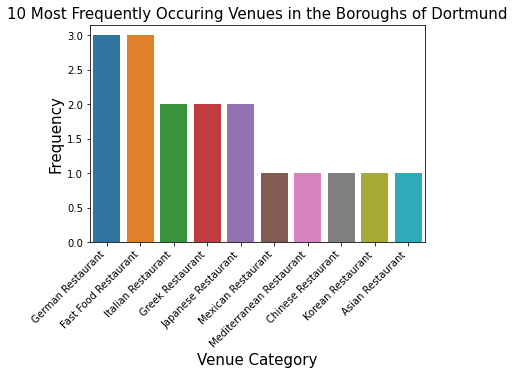

<Figure size 1296x504 with 0 Axes>

In [26]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Dortmund_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in the Boroughs of Dortmund', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

Let's look at the dataframe

In [27]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Dortmund_restaurants.shape)
Dortmund_restaurants.head(50)

Shape of the Data-Frame with Venue Category only Restaurant:  (23, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Dortmund Innenstadt-Nord,51.529537,7.468574,Yüksel Grill,51.525472,7.469421,Turkish Restaurant
2,Dortmund Innenstadt-Nord,51.529537,7.468574,Gourmet Tempel,51.528895,7.473036,Asian Restaurant
3,Dortmund Innenstadt-Nord,51.529537,7.468574,Burger King,51.526317,7.472377,Fast Food Restaurant
4,Dortmund Innenstadt-Ost,51.509074,7.491317,China Imbiss Bui,51.512016,7.492530,Chinese Restaurant
5,Dortmund Innenstadt-Ost,51.509074,7.491317,Schnitzelhaus,51.511730,7.487904,German Restaurant
6,Dortmund Brackel,51.520676,7.549654,Döner König,51.523737,7.545059,Fast Food Restaurant
7,Dortmund Aplerbeck,51.490162,7.553002,Da Nino,51.488125,7.554122,Italian Restaurant
8,Dortmund Aplerbeck,51.490162,7.553002,El Greco,51.492305,7.549898,Greek Restaurant
9,Dortmund Aplerbeck,51.490162,7.553002,Platia,51.493318,7.552517,Greek Restaurant
10,Dortmund Hörde,51.487762,7.500226,Burger King,51.487600,7.499780,Fast Food Restaurant


In [28]:
Dortmund_restaurants_new = Dortmund_restaurants.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

Let's see each Neighborhood

In [29]:
Dortmund_restaurants_new

Neighborhood
Dortmund Aplerbeck           3
Dortmund Brackel             1
Dortmund Hombruch            1
Dortmund Hörde               2
Dortmund Innenstadt-Nord     3
Dortmund Innenstadt-Ost      2
Dortmund Mitte              11
Name: Venue Category, dtype: int64

In [30]:
Dortmund_restaurants_new_df  = Dortmund_restaurants_new.to_frame().reset_index()
Dortmund_restaurants_new_df.columns = ['Neighborhood', 'Number of Restaurant']
Dortmund_restaurants_new_df.index = np.arange(1, len(Dortmund_restaurants_new_df)+1)
list_rest_no =Dortmund_restaurants_new_df['Number of Restaurant'].to_list()
list_dist =Dortmund_restaurants_new_df['Neighborhood'].to_list()

In [31]:
# one hot encoding
Dortmund_onehot = pd.get_dummies(Dortmund_restaurants[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Dortmund_onehot['Neighborhood'] = Dortmund_restaurants['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Dortmund_onehot.columns[-1]] + list(Dortmund_onehot.columns[:-1])
Dortmund_onehot = Dortmund_onehot[fixed_columns]

Dortmund_onehot.head()

,Neighborhood,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Mongolian Restaurant,Seafood Restaurant,Sushi Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Dortmund Innenstadt-Nord,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Dortmund Innenstadt-Nord,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Dortmund Innenstadt-Nord,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Dortmund Innenstadt-Ost,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Dortmund Innenstadt-Ost,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# And let's examine the new dataframe size.
Dortmund_onehot.shape

(23, 17)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [33]:
Dortmund_grouped = Dortmund_onehot.groupby('Neighborhood').mean().reset_index()
Dortmund_grouped

,Neighborhood,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Mongolian Restaurant,Seafood Restaurant,Sushi Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Dortmund Aplerbeck,0.000000,0.0,0.000000,0.000000,0.666667,0.333333,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,Dortmund Brackel,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,Dortmund Hombruch,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,Dortmund Hörde,0.000000,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,Dortmund Innenstadt-Nord,0.333333,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.333333,0.000000,0.000000
5,Dortmund Innenstadt-Ost,0.000000,0.5,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,Dortmund Mitte,0.000000,0.0,0.000000,0.181818,0.000000,0.090909,0.181818,0.090909,0.0,0.090909,0.0,0.090909,0.090909,0.000000,0.090909,0.090909


Let's see the new size

In [34]:
Dortmund_grouped.shape

(7, 17)

Let's print each neighborhood along with the top 5 most common venues

In [35]:
num_top_venues = 5

for hood in Dortmund_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Dortmund_grouped[Dortmund_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Dortmund Aplerbeck----
                  venue  freq
0      Greek Restaurant  0.67
1    Italian Restaurant  0.33
2      Asian Restaurant  0.00
3    Chinese Restaurant  0.00
4  Fast Food Restaurant  0.00


----Dortmund Brackel----
                  venue  freq
0  Fast Food Restaurant   1.0
1      Asian Restaurant   0.0
2    Chinese Restaurant   0.0
3     German Restaurant   0.0
4      Greek Restaurant   0.0


----Dortmund Hombruch----
                  venue  freq
0  Mongolian Restaurant   1.0
1      Asian Restaurant   0.0
2    Chinese Restaurant   0.0
3  Fast Food Restaurant   0.0
4     German Restaurant   0.0


----Dortmund Hörde----
                      venue  freq
0      Fast Food Restaurant   0.5
1  Mediterranean Restaurant   0.5
2          Asian Restaurant   0.0
3        Chinese Restaurant   0.0
4         German Restaurant   0.0


----Dortmund Innenstadt-Nord----
                  venue  freq
0      Asian Restaurant  0.33
1  Fast Food Restaurant  0.33
2    Turkish Restaurant 

Turn it into a panda dataframe

In [36]:
#First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 5 venues for each neighborhood

In [60]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Dortmund_grouped['Neighborhood']

for ind in np.arange(Dortmund_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Dortmund_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Dortmund Aplerbeck,Greek Restaurant,Italian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant
1,Dortmund Brackel,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Sushi Restaurant
2,Dortmund Hombruch,Mongolian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Sushi Restaurant
3,Dortmund Hörde,Mediterranean Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant
4,Dortmund Innenstadt-Nord,Turkish Restaurant,Fast Food Restaurant,Asian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant
5,Dortmund Innenstadt-Ost,German Restaurant,Chinese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant
6,Dortmund Mitte,Japanese Restaurant,German Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant


### 3.3 Cluster Neighborhoods

Run k-means to cluster the neighborhood into 3 clusters

In [61]:
kclusters = 3

Dortmund_grouped_clustering = Dortmund_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Dortmund_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 1, 0, 0, 2, 2], dtype=int32)

Create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood



In [62]:

# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Dortmund_merged = Boroughs

Dortmund_merged.rename(columns={'Name':'Neighborhood'}, inplace=True)

# merge Dortmund with Dortmund_data to add latitude/longitude for each neighborhood
Dortmund_merged = Dortmund_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Borough')

Dortmund_merged.head(20)

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Dortmund Innenstadt-West,51.508883,7.432308,NaN,NaN,NaN,NaN,NaN,NaN
5,Dortmund Innenstadt-Nord,51.529537,7.468574,0.0,Turkish Restaurant,Fast Food Restaurant,Asian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant
9,Dortmund Innenstadt-Ost,51.509074,7.491317,2.0,German Restaurant,Chinese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant
14,Dortmund Eving,51.532710,7.479094,NaN,NaN,NaN,NaN,NaN,NaN
19,Dortmund Scharnhorst,51.538311,7.536432,NaN,NaN,NaN,NaN,NaN,NaN
27,Dortmund Brackel,51.520676,7.549654,0.0,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Sushi Restaurant
32,Dortmund Aplerbeck,51.490162,7.553002,2.0,Greek Restaurant,Italian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant
38,Dortmund Hörde,51.487762,7.500226,0.0,Mediterranean Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant
46,Dortmund Hombruch,51.497679,7.448466,1.0,Mongolian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Sushi Restaurant
56,Dortmund Lütgendortmund,51.500722,7.334160,NaN,NaN,NaN,NaN,NaN,NaN


## 3.4 Examine the Clusters

No we can examine each cluster and determine the discriminating venue categories that distinguish each cluster

### Cluster 1

In [71]:
Dortmund_merged.loc[Dortmund_merged['Cluster Labels'] == 0, Dortmund_merged.columns[[0] + list(range(4, Dortmund_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Dortmund Innenstadt-Nord,Turkish Restaurant,Fast Food Restaurant,Asian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant
27,Dortmund Brackel,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Sushi Restaurant
38,Dortmund Hörde,Mediterranean Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant


### Cluster 2

In [72]:
Dortmund_merged.loc[Dortmund_merged['Cluster Labels'] == 1, Dortmund_merged.columns[[0] + list(range(4, Dortmund_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
46,Dortmund Hombruch,Mongolian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Sushi Restaurant


### Cluster 3

In [73]:
Dortmund_merged.loc[Dortmund_merged['Cluster Labels'] == 2, Dortmund_merged.columns[[0] + list(range(4, Dortmund_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
9,Dortmund Innenstadt-Ost,German Restaurant,Chinese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant
32,Dortmund Aplerbeck,Greek Restaurant,Italian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant
12,Dortmund Mitte,Japanese Restaurant,German Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant


## 4. Results

We found various Results. The most important ones are:

- We have six neighboorhoods that don't have restaurants
- We have eight neighboorhoods with restaurants

The most common venue in each Neighboorhood are a restaurant with this kind of food:

- Innenstadt Nord: Turkish
- Innenstadt Ost: German
- Brackel: Fast Food
- Aplerpeck: Greek
- Hörde: Mediterenian
- Hombruch: Mongolian
- Mitte: Japanese

## 5. Discussion

There are a few things to discuss:
- In six neihghboorhoods we don't have any restaurants at all according to foursquare. This is not true. So we have missing data
- In the other eight neighboorhoods we have a variety of restaurant styles

## 6. Conclusion

So if you come to Dortmund and don't know where to stay we have three clusters or eight neighboorshoods with various restaurants. A deeper dive may be needed as there seem 

The results can help a visitor to decide about the district that fit the most his needs.